# Team #4_Midterm Project

# Introduction

## Context:
* This dataset contains information about people who were able to purchase an SUV based on other factors in their lives.  

* In 3-4 sentences state what you will be doing in this project.
 - We will be using the data to predict whether or not a person will purchase an SUV based on their age. We will be using a logistic regression model and a decision tree model to predict the outcome, we will also be using a confusion matrix to evaluate the accuracy of our models and improving the accuracy score to get 81% or higher.
 
* Additionally, state which machine learning type you will be using in this project and why.
 - We will be using a classification model (Logistic Regression) and Decision Tree


## Objective:

- What are the factors that enable people to purchase a new SUV? Gender, Age nd Estimated Salary.
- To predict "Purchase" as our dependent or target (y = 'Purchase') variable based on the independent (X) variables

## Data Description:

* User ID: User's ID (the SUV purchaser)
* Gender: User's gender 
* Age: User's age  
* Estimated: User's income
* Purchased: Whether the user purchased an SUV or not. (This is the target variable).

# Importing Libraries

In [1]:
import numpy as np                # for numerical data 
import pandas as pd               # for data analysis
import matplotlib.pyplot as plt   # for data visualization
import seaborn as sns             # for statistical plotting 
import pylab as plot

%matplotlib inline               
import math

from sklearn.impute import SimpleImputer   # for imputing missing values
from sklearn.preprocessing import StandardScaler  # for data transformation and data pre-processing befor model-building

from sklearn.model_selection import train_test_split # for splitting dataset into training and test sets

from sklearn.linear_model import LogisticRegression  # for building logistic regression (classification) model
from sklearn.tree import DecisionTreeClassifier      # for building a decision tree model 

from sklearn import metrics  # for getting model performance scores 
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score  
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix  # for creating the confustion matrix 
from sklearn.metrics import plot_confusion_matrix


## Reading Data

In [26]:
df = pd.read_csv('suv_dataset.csv') # loading the dataset for the project

## Basic Data Exploration (data processing)

In [50]:
suv = df.copy() # creating a copy of the dataset

In [73]:
suv.head() # displaying the first five rows of the dataset

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000,0
1,Male,35.0,20000,0
2,Female,26.0,43000,0
3,Female,27.0,57000,0
4,Male,19.0,76000,0


In [88]:
suv.tail() # displaying the last five rows of the dataset

,Gender,Age,EstimatedSalary,Purchased
395,Female,46.0,41000,1
396,Male,51.0,23000,1
397,Female,50.0,20000,1
398,Male,36.0,33000,0
399,Female,49.0,36000,1


In [ ]:
suv.shape # displaying the number of rows and columns in the dataset

(400, 4)

In [104]:
suv.info() # displaying the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    object 
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    int64  
 3   Purchased        400 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.6+ KB


In [118]:
suv.isnull().sum() # checking for missing values in the dataset

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
suv.describe() # displaying the statistical summary of the dataset

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.745000,69742.500000,0.357500
std,10.399054,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,30.000000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## EDA (Exploratory Data Analysis)

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab as plot
import math
import warnings

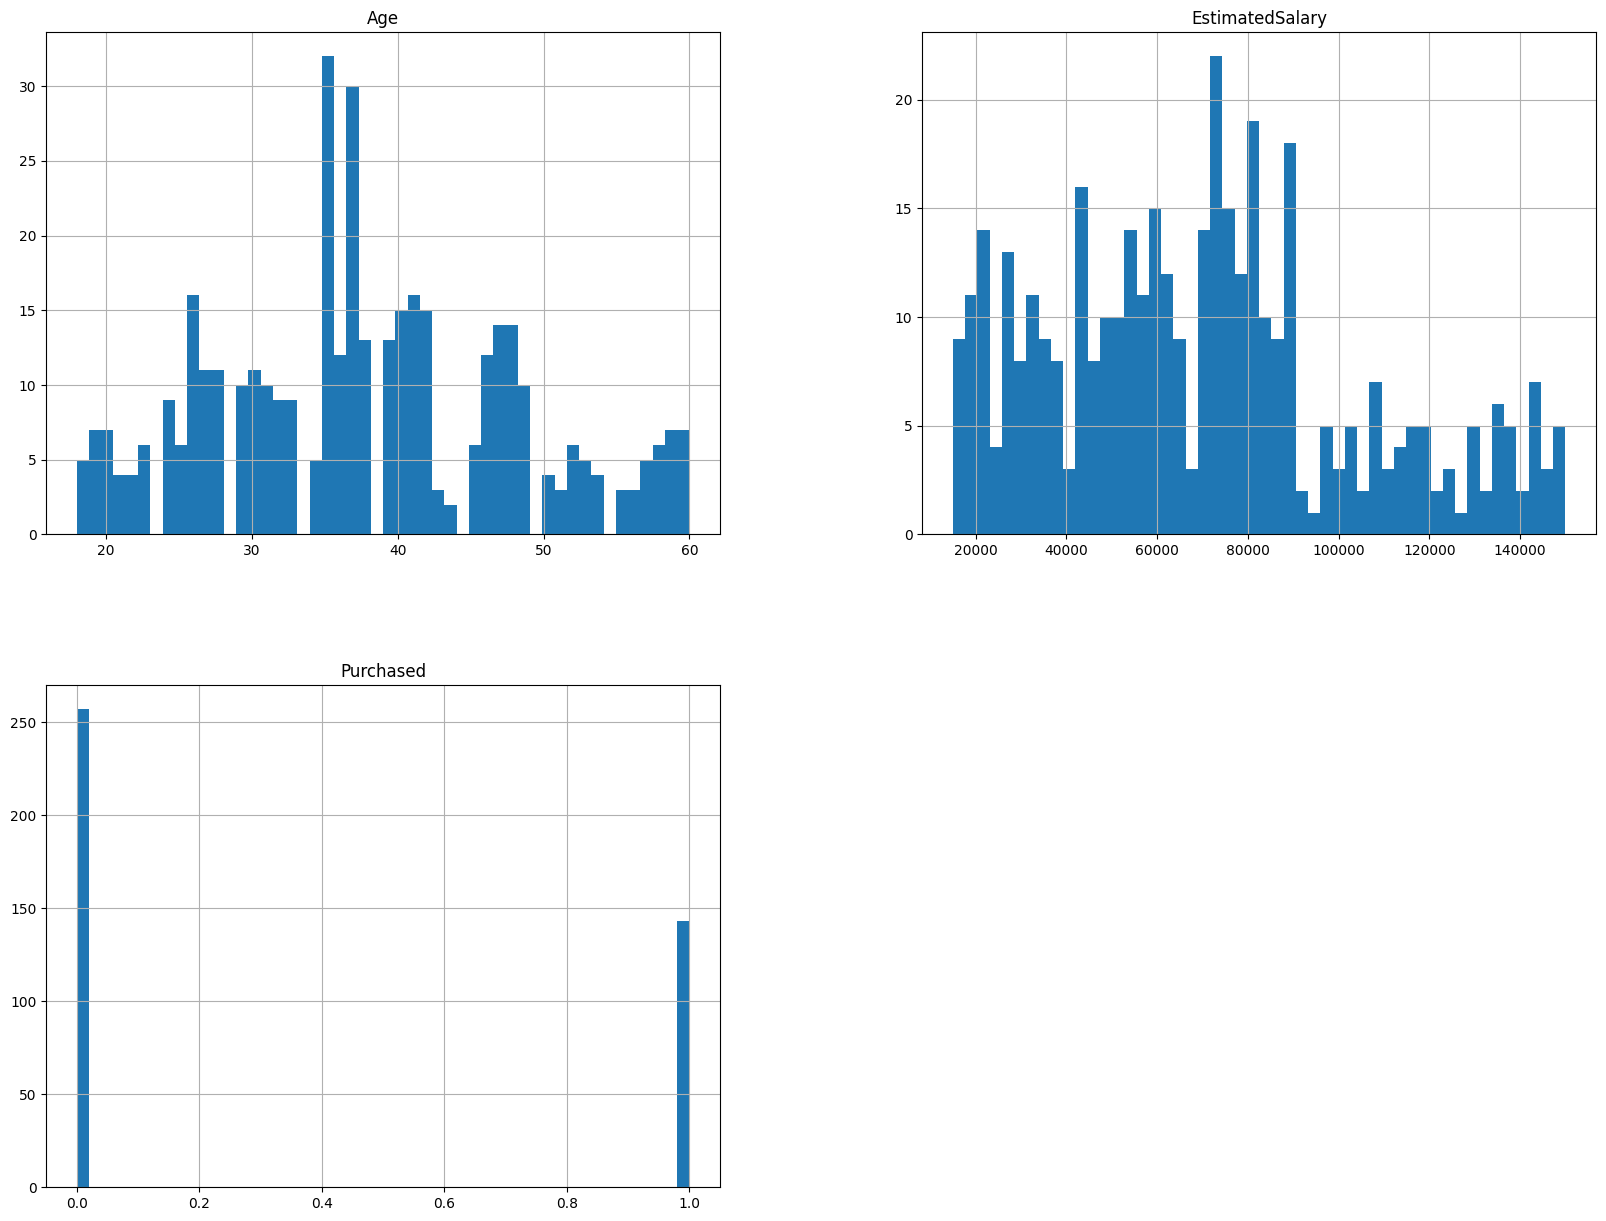

In [142]:
suv.hist(bins=50, figsize=(20,15)) # displaying the histogram of the dataset
plt.show() # displaying the histogram of the dataset

<AxesSubplot: xlabel='Purchased', ylabel='count'>

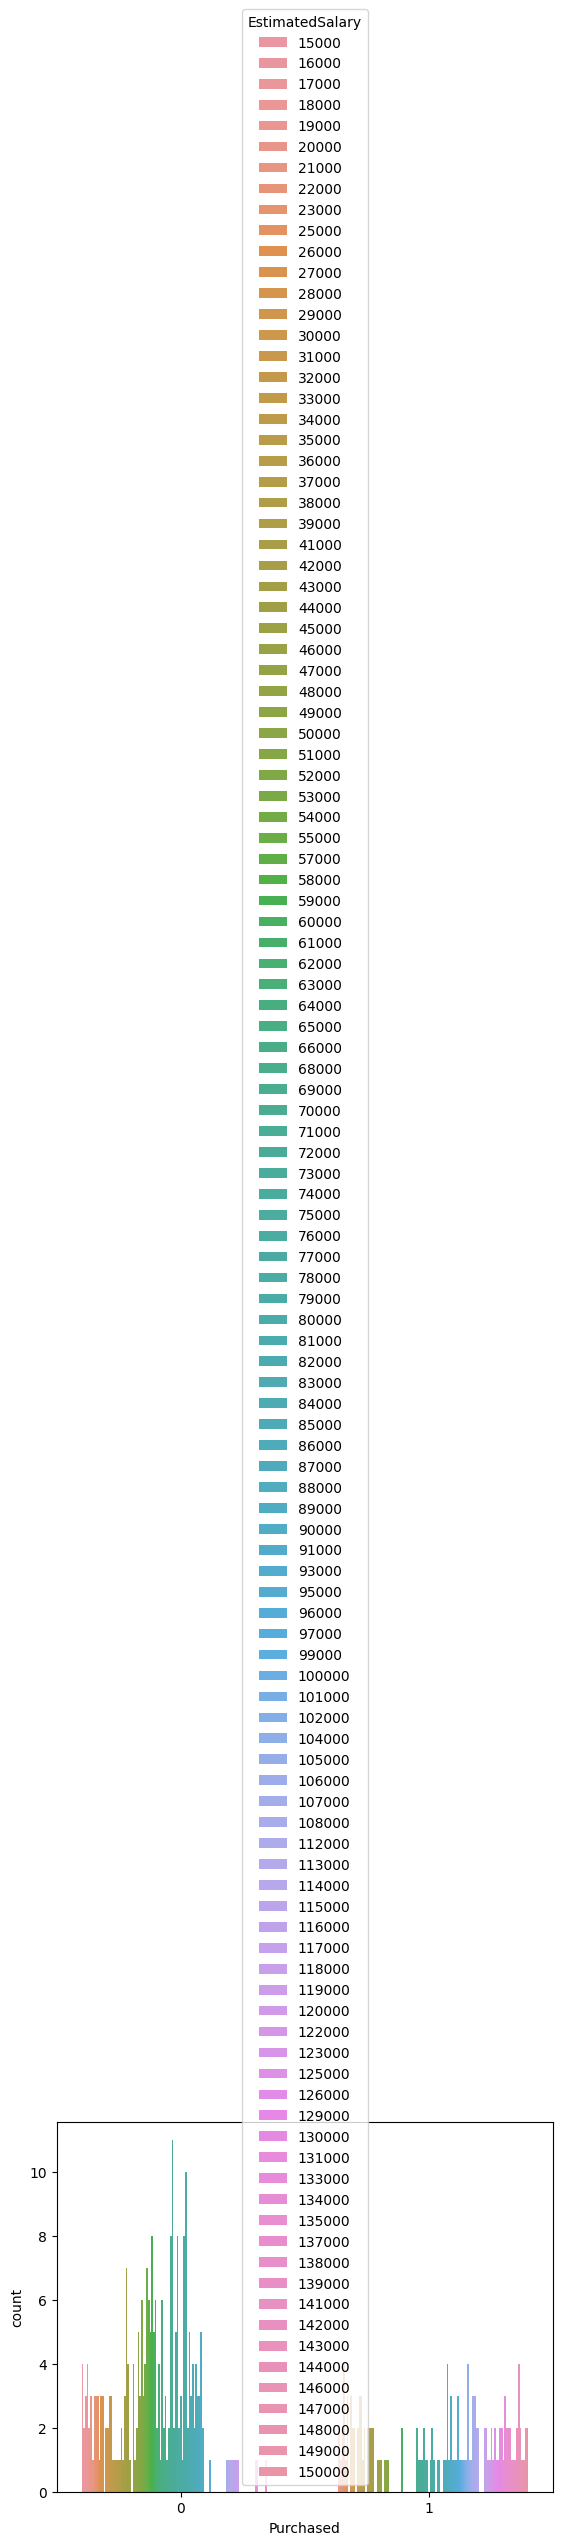

In [152]:
sns.countplot(x='Purchased', hue='EstimatedSalary', data=suv) # displaying the countplot of the dataset

<AxesSubplot: xlabel='Purchased', ylabel='count'>

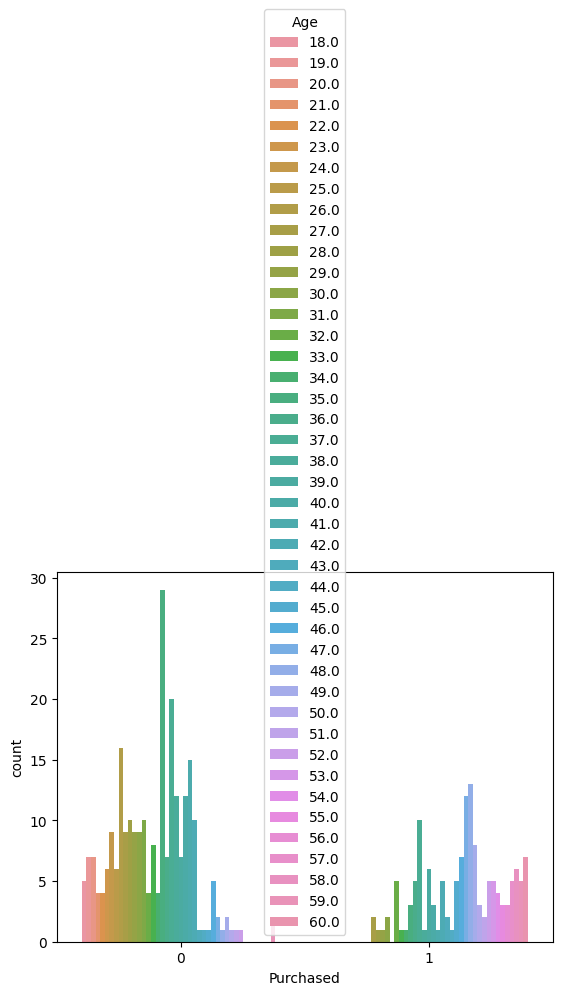

In [161]:
sns.countplot(x='Purchased', hue='Age', data=suv) # displaying the countplot of the dataset

<AxesSubplot: xlabel='Purchased', ylabel='count'>

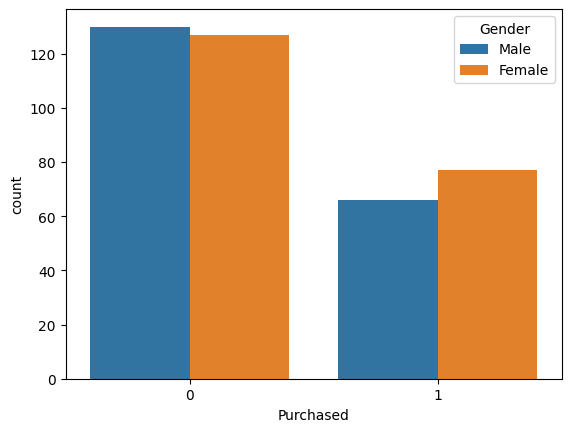

In [169]:
sns.countplot(x='Purchased', hue='Gender', data=suv) # displaying the countplot of the dataset

<AxesSubplot: xlabel='Purchased', ylabel='count'>

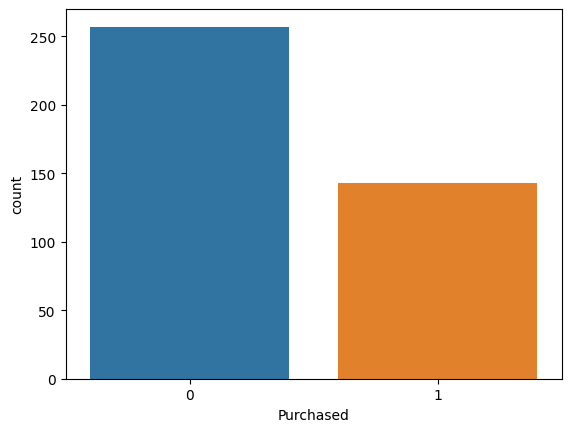

In [176]:
sns.countplot(x='Purchased', data=suv) # displaying the countplot of the dataset


<AxesSubplot: ylabel='Frequency'>

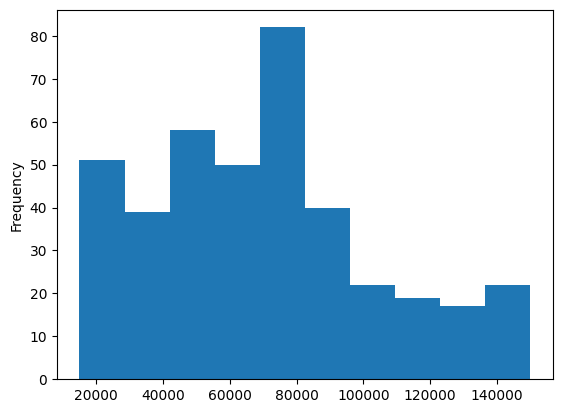

In [182]:
suv['EstimatedSalary'].plot.hist() # displaying the histogram of the dataset

<AxesSubplot: ylabel='Frequency'>

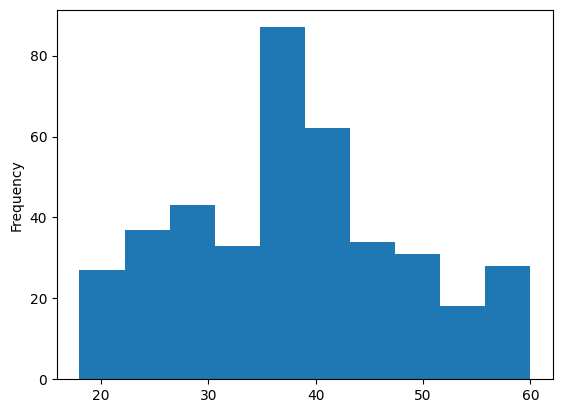

In [187]:
suv['Age'].plot.hist() # displaying the histogram of the dataset

<AxesSubplot: >

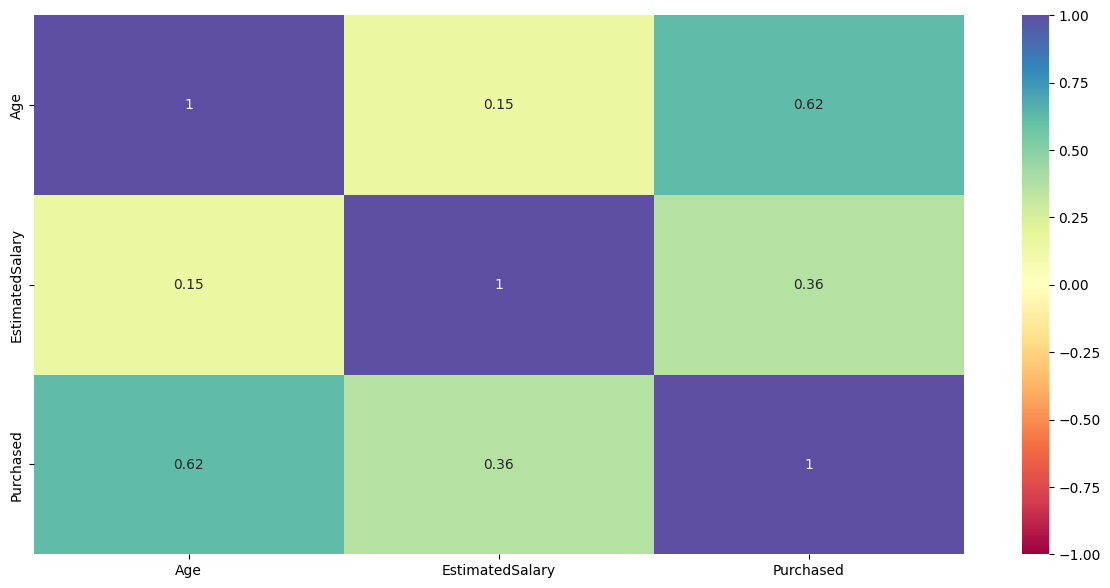

In [191]:
plt.figure(figsize=(15,7)) # displaying the boxplot of the dataset
sns.heatmap(suv.corr(), annot=True, vmin=-1, cmap='Spectral') # displaying the heatmap of the dataset

## Data Preprocessing

In [194]:
suv.info() # displaying the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    object 
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    int64  
 3   Purchased        400 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.6+ KB


In [ ]:
suv.drop(['User ID'], axis=1, inplace=True) # dropping the column 'User ID' from the dataset

In [235]:
suv.shape # displaying the number of rows and columns in the dataset

(400, 4)

In [236]:
suv.isnull().sum() # checking for missing values in the dataset

Age                0
EstimatedSalary    0
Purchased          0
Male               0
dtype: int64

In [237]:
suv.info() # displaying the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              400 non-null    float64
 1   EstimatedSalary  400 non-null    int64  
 2   Purchased        400 non-null    int64  
 3   Male             400 non-null    uint8  
dtypes: float64(1), int64(2), uint8(1)
memory usage: 9.9 KB


In [238]:
suv.isnull().sum() * 100 / len(suv) # checking for missing values in the dataset

Age                0.0
EstimatedSalary    0.0
Purchased          0.0
Male               0.0
dtype: float64

In [239]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=RuntimeWarning)
    suv['Age'].fillna(suv['Age'].median(), inplace=True) # imputing the missing values in the column 'Age' with the median value

In [ ]:
suv1 = pd.get_dummies(suv[
    'Gender'
]) # creating dummy variables for the column


In [255]:
suv1.head() # displaying the first five rows of the dataset

,Male
0,1
1,1
2,0
3,0
4,1


In [ ]:
suv1 = pd.get_dummies(suv['Gender'], drop_first=True) # creating dummy variables for the column

In [257]:
suv1.head() # displaying the first five rows of the dataset

,Male
0,1
1,1
2,0
3,0
4,1


In [258]:
suv = pd.concat([suv, suv1], axis=1) # concatenating the dataset with the dummy variables

In [259]:
suv.head() # displaying the first five rows of the dataset

,Age,EstimatedSalary,Purchased,Male,Male
0,19.0,19000,0,1,1
1,35.0,20000,0,1,1
2,26.0,43000,0,0,0
3,27.0,57000,0,0,0
4,19.0,76000,0,1,1


In [260]:
suv.drop('Gender', axis=1, inplace=True) # dropping the column gender from the dataset

KeyError: "['Gender'] not found in axis"

In [ ]:
suv.head(3) # displaying the first three rows of the dataset

,Age,EstimatedSalary,Purchased,Male
0,19.0,19000,0,1
1,35.0,20000,0,1
2,26.0,43000,0,0


## Building Classification Model

In [ ]:
# 1. let's define x (every column except for purchased) and y (purchased)
X = suv.drop('Purchased', axis=1)
y = suv['Purchased']

In [ ]:
# 2. let's split the dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
X.head() # displaying the first five rows of the dataset

,Age,EstimatedSalary,Male
0,19.0,19000,1
1,35.0,20000,1
2,26.0,43000,0
3,27.0,57000,0
4,19.0,76000,1


In [ ]:
print('Shape of Training Set: ', X_train.shape) # displaying the shape of the training set
print('Shape of the Test Set: ', X_test.shape) # displaying the shape of the test set

Shape of Training Set:  (280, 3)
Shape of the Test Set:  (120, 3)


In [ ]:
model = LogisticRegression(random_state=1) # creating an instance of the model

In [ ]:
model.fit(X_train, y_train) # fitting the model on the training set

LogisticRegression()

In [ ]:
prediction = model.predict(X_test) # making predictions on the test set

## Evaluating Model

In [261]:
model_score = model.score(X_test, y_test) # getting the model score
print('Model Score: ', model_score) # displaying the model score

Model Score:  0.6


In [262]:
print(classification_report(y_test, prediction)) # displaying the classification report

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        72
           1       0.00      0.00      0.00        48

    accuracy                           0.60       120
   macro avg       0.30      0.50      0.37       120
weighted avg       0.36      0.60      0.45       120



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [263]:
y_test.value_counts() # displaying the value counts of the test set

0    72
1    48
Name: Purchased, dtype: int64

### Confusion Matrix

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


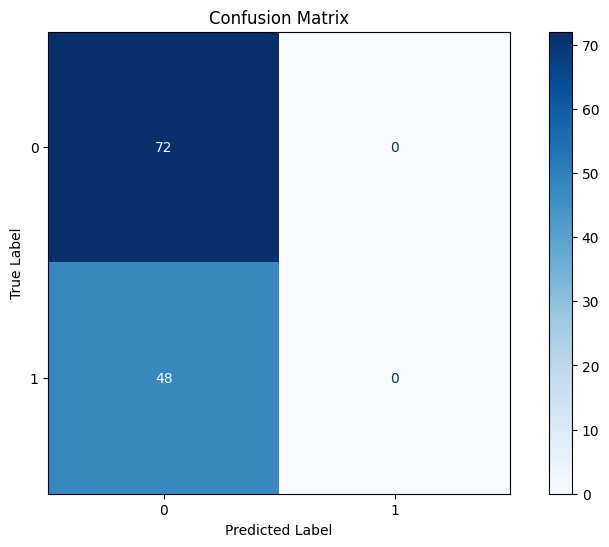

In [266]:
# confusion matrix to see the accuracy of the model
matrix = plot_confusion_matrix(model, X_test, y_test, cmap=plot.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10, 6)
plt.show()

### Decision Tree

In [267]:
model_2 = DecisionTreeClassifier(random_state=1) # creating an instance of the model
model_2.fit(X_train, y_train) # fitting the model on the training set
prediction = model_2.predict(X_test) # making predictions on the test set

In [268]:
model_2_score = model_2.score(X_test, y_test) # getting the model score
print('Model Score: ', model_2_score) # displaying the model score

Model Score:  0.8333333333333334


## Improving the Model